In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt


def get_random_covariance(d):
    """
    Function to generate a random, valid covariance matrix of size d x d
    """
    sigma = np.random.rand(d, d) - 0.5
    sigma = np.dot(sigma, sigma.T)  # make the matrix symmetric
    return sigma


def get_random_gaussian_dist(d, distance=5):
    """
     generate a random Gaussian distribution with mean mu and covariance matrix sigma
    The distance parameter specifies the distance of the mean from the origin
    """
    sigma = get_random_covariance(d)  # generate a random covariance matrix
    mu = np.array(np.random.rand(d)) * distance  # generate a random mean
    return mu, sigma


def generate_normal_datapoint(guaussian_dist):
    """
     generate a single datapoint from a Gaussian distribution with mean and covariance matrix guaussian_dist
    """
    mean = guaussian_dist[0]
    cov = guaussian_dist[1]
    dp = np.random.multivariate_normal(mean, cov, check_valid='warn', tol=1e-8)
    return dp


def generate_gaussian_cluster(guaussian_dist, k, dataset=None):
    """
    Function to generate a cluster of k datapoints from the Gaussian distribution guaussian_dist
    The dataset parameter can be used to append the generated cluster to an existing dataset
    """
    cluster = np.empty((0, 3))  # initialize an empty array to store the datapoints
    for i in range(k):
        p = generate_normal_datapoint(guaussian_dist)  # generate a single datapoint
        cluster = np.append(cluster, [p], axis=0)  # add the datapoint to the cluster
    if dataset:
        dataset = np.append(dataset, cluster)  # append the cluster to an existing dataset, if provided
    return cluster

In [2]:
p = generate_gaussian_cluster(get_random_gaussian_dist(3), 200)
print(p.shape)

(200, 3)


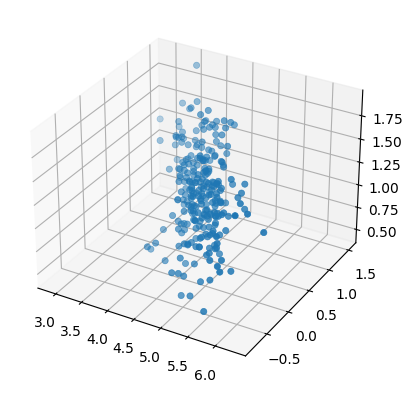

In [5]:
def visualize_3D(data, labels = None):

    ax = plt.axes(projection='3d')
    # scatter plot the points in the current cluster with the current color 🌈
    if labels:
        color = np.array(labels)*4
    ax.scatter(data[:,0],data[:,1],data[:,2], linewidth=0.5)
#
p = generate_gaussian_cluster(get_random_gaussian_dist(3), 260)
visualize_3D(p,1)



In [6]:

def generate_clusters(n,k,d):
    labels = []
    clusters = np.empty((0,d))
    # for k clusters:
    for i in range (k):
        cluster = generate_gaussian_cluster(get_random_gaussian_dist(d),n[i])
        clusters = np.append(clusters,cluster, axis=0)

        labels += [i]*n[i]

    return clusters, labels

d = 3
k =5
n =[70,80,90,100,110]

data,labels = generate_clusters(n,k,d)

print(data.shape)
print(len(labels))

(450, 3)
450


In [7]:

def visualize_3D_clusters(data,labels =None):
    # initialize the color for plotting clusters 🎨
    color = 0
    # create a new figure and set up a 3D plot 🌟
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # iterate through each cluster 💫
    # scatter plot the points in the current cluster with the current color 🌈
    if labels:
        # unique color value for each cluster 🎨
        color = np.array(labels)*2 + np.random.rand(len(labels))
    # set the colormap to 'plasma' and linewidth to 0.5 🌟
    ax.scatter(data[:, 0], data[:, 1], data[:, 2],c =labels, cmap='winter', linewidth=0.5)

    # show the plot 🎉
    plt.show()

## Visualize clusters with correct labels

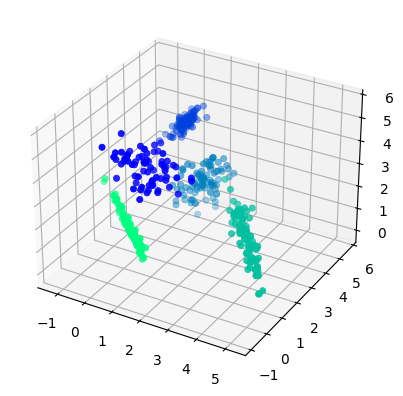

In [8]:

visualize_3D_clusters(data,labels)

## Visualize unlabeled clusters


C:\Users\nadav\AppData\Local\Temp\ipykernel_8604\3707968345.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(data[:, 0], data[:, 1], data[:, 2],c =labels, cmap='winter', linewidth=0.5)


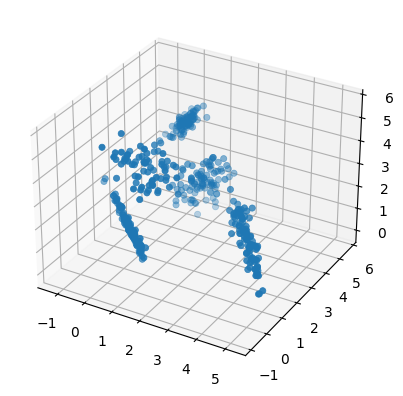

In [9]:
visualize_3D_clusters(data)


# Make Lines and shapes
To construct a covariance matrix for a Gaussian distribution that looks like a line between two points $p_1$ and $p_2$, you can use the following steps:

* Define a vector $\mathbf{v}$ as the difference between $p_1$ and $p_2$: $\mathbf{v} = \mathbf{p}_2 - \mathbf{p}_1$.

* Normalize the vector $\mathbf{v}$ to obtain a unit vector $\mathbf{u}$: $\mathbf{u} = \frac{\mathbf{v}}{|\mathbf{v}|}$, where $|\mathbf{v}|$ denotes the Euclidean norm of $\mathbf{v}$.

* Choose a scalar value $\sigma$ that controls the spread of the covariance matrix along the line between $p_1$ and $p_2$.

* Construct the covariance matrix $\boldsymbol{\Sigma}$ as follows:

* Compute the outer product of $\mathbf{u}$ with itself: $\mathbf{u}\mathbf{u}^\top$, where $^\top$ denotes the transpose operation.

* Scale the outer product by $\sigma^2$: $\sigma^2 \mathbf{u}\mathbf{u}^\top$.

* Add a diagonal matrix that scales the covariance matrix in the directions orthogonal to the line between $p_1$ and $p_2$. One way to do this is to choose a scalar value $\epsilon$ that represents the spread of the distribution in these directions, and add $\epsilon^2$ times the identity matrix $\mathbf{I}$ to the scaled outer product: $\boldsymbol{\Sigma} = \sigma^2 \mathbf{u}\mathbf{u}^\top + \epsilon^2 \mathbf{I}$.

The resulting covariance matrix $\boldsymbol{\Sigma}$ will have a line-shaped structure along the direction of $\mathbf{u}$, and will be scaled uniformly in the orthogonal directions by the parameter $\epsilon$. You can adjust the parameters $\sigma$ and $\epsilon$ to control the shape and size of the covariance matrix to fit your needs.


In [60]:
def get_gaussian_line_shape_distribution(p1,p2):
    v = p2 - p1
    v_norm = np.linalg.norm(v)
    u = v/v_norm

    sigma = v_norm * np.outer(u,u)

    epsilon = 0.005 * np.identity(sigma.shape[0])
    sigma +=epsilon

    mu = p1 + (p2 - p1)/2

    return mu, sigma




p1 = np.array([1,2,3])
p2 = np.array([0,0,0])
l = get_gaussian_line_shape_distribution(p1,p2)



## Visualyze our line

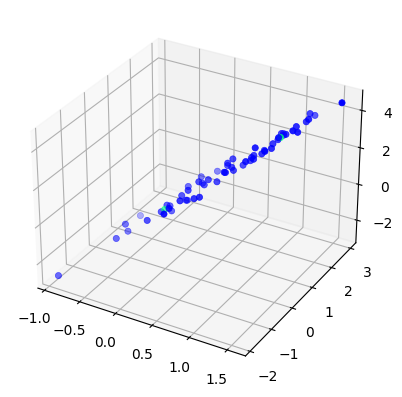

In [85]:
line = generate_gaussian_cluster(l,60)
labels= [1 for i in line]+[2,2]
data2 = np.append(line,[p1,p2],axis=0)
visualize_3D_clusters(data2,labels )


## Make Triangles

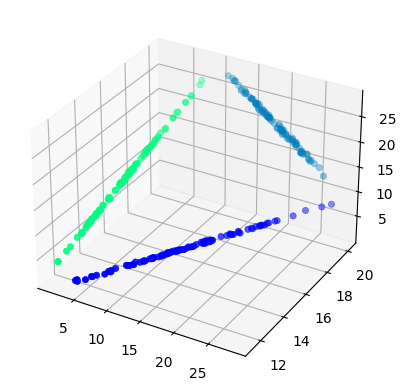

In [81]:

def generate_polygon(n,P,d):
    labels = []
    clusters = np.empty((0,d))
    # for k clusters:
    for i,p in enumerate (P):
        cluster = generate_gaussian_cluster(get_gaussian_line_shape_distribution(P[i-1],p),n[i])
        clusters = np.append(clusters,cluster, axis=0)

        labels += [i]*n[i]

    return clusters, labels




points = np.array([[30,20,10],[10,20,30],[0,10,0]])
d,labels = generate_polygon([100]*3,points,3)
visualize_3D_clusters(d,labels )

## Or Stars

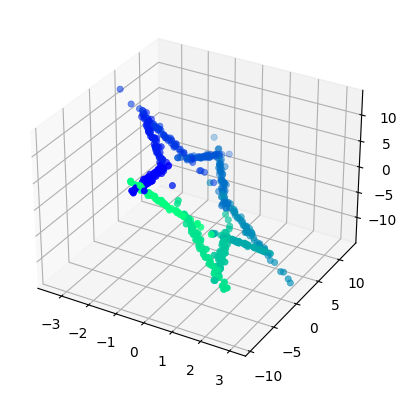

In [84]:
theta = np.linspace(0, 2*np.pi, 10, endpoint=False)
r = np.array([5,10,5,10,5,10,5,10,5,10])
x = r * np.cos(theta)
y = r * np.sin(theta)
z = np.zeros_like(theta)

points = np.array([[x[i],y[i],z[i]] for i in range(10)])

rotation = np.array([[-0.2018353 , -0.23967206,  0.94967418],
                     [-0.16056322,  0.97078361,  0.17884672],
                     [-0.96620219, -0.0075852 , -0.25795524]])
points = points @ rotation
d,labels = generate_polygon([60]*10,points,3)
visualize_3D_clusters(d,labels )